In [ ]:
!python --version

# 오라클 db를 연동시키기 위해 아래 cx_Oracle install

In [4]:
!pip install cx_Oracle -q

In [11]:
## dataframe으로 불러오기
import cx_Oracle
import pandas as pd

## 데어터베이스 연결 (사용자계정,PW,호스트이름:포트/SID)
con = cx_Oracle.connect("c##hr","hr","localhost:1521/xe")

## 데이터베이스와의 상호작용을 위한 커서를 생성
cur=con.cursor()

## employees table의 모든 데이터를 선택하는 쿼리를 실행.
cur.execute('select * from EMPLOYEES')

## 쿼리 결과를 모두 가져와 res변수에 저장
res=cur.fetchall()

## data를 df로 변환
df=pd.DataFrame(res)

## EMPLOYEES 테이블의 컬럼 이름을 조회하는 쿼리를 실행
## col=[('EMPLOYEE_ID',),('FIRST_NAME',),('LAST_NAME,),(SALARY',)...]
cur.execute("select column_name from user_tab_columns where table_name='EMPLOYEES'")

## 컬럼 이름 결과를 모두 가져와 COL 변수에 저장
col=cur.fetchall()

## 컬럼 이름 리스트 생성
li = []
for i in col:
    #print(i)
    for j in i:
        #print(j)
        li.append(j)
## 데이터프레임 컬럼 이름 설정
df.columns =li
print(df.head())

##커서를 닫는다
cur.close()
## 데이터베이스 연결을 닫는다
con.close()

   EMPLOYEE_ID FIRST_NAME  LAST_NAME     EMAIL  PHONE_NUMBER  HIRE_DATE  \
0          198     Donald   OConnell  DOCONNEL  650.507.9833 2007-06-21   
1          199    Douglas      Grant    DGRANT  650.507.9844 2008-01-13   
2          200   Jennifer     Whalen   JWHALEN  515.123.4444 2003-09-17   
3          201    Michael  Hartstein  MHARTSTE  515.123.5555 2004-02-17   
4          202        Pat        Fay      PFAY  603.123.6666 2005-08-17   

     JOB_ID   SALARY  COMMISSION_PCT  MANAGER_ID  DEPARTMENT_ID  
0  SH_CLERK   2600.0             NaN       124.0           50.0  
1  SH_CLERK   2600.0             NaN       124.0           50.0  
2   AD_ASST   4400.0             NaN       101.0           10.0  
3    MK_MAN  13000.0             NaN       100.0           20.0  
4    MK_REP   6000.0             NaN       201.0           20.0  


In [12]:
df.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,198,Donald,OConnell,DOCONNEL,650.507.9833,2007-06-21,SH_CLERK,2600.0,NaN,124.0,50.0
1,199,Douglas,Grant,DGRANT,650.507.9844,2008-01-13,SH_CLERK,2600.0,NaN,124.0,50.0
2,200,Jennifer,Whalen,JWHALEN,515.123.4444,2003-09-17,AD_ASST,4400.0,NaN,101.0,10.0
3,201,Michael,Hartstein,MHARTSTE,515.123.5555,2004-02-17,MK_MAN,13000.0,NaN,100.0,20.0
4,202,Pat,Fay,PFAY,603.123.6666,2005-08-17,MK_REP,6000.0,NaN,201.0,20.0


In [13]:
## 통계 요약본을 보여주는 함수
df.describe()

,EMPLOYEE_ID,HIRE_DATE,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
count,107.000000,107,107.000000,35.000000,106.000000,106.000000
mean,153.000000,2005-11-09 04:15:42.056074752,6461.831776,0.222857,124.764151,63.207547
min,100.000000,2001-01-13 00:00:00,2100.000000,0.100000,100.000000,10.000000
25%,126.500000,2005-02-07 12:00:00,3100.000000,0.150000,108.000000,50.000000
50%,153.000000,2006-01-03 00:00:00,6200.000000,0.200000,122.000000,50.000000
75%,179.500000,2007-02-15 00:00:00,8900.000000,0.300000,145.000000,80.000000
max,206.000000,2008-04-21 00:00:00,24000.000000,0.400000,205.000000,110.000000
std,31.032241,NaN,3909.579731,0.085184,20.315395,20.910110


<Axes: ylabel='Frequency'>

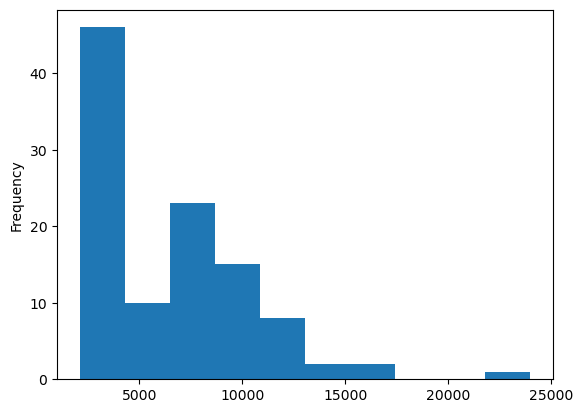

In [14]:
df.SALARY.plot(kind='hist')

In [ ]:
# drop
import cx_Oracle
con = cx_Oracle.connect("c##hr","hr","localhost:1521/xe")
cur=con.cursor()
sql='drop table sample1'
cur.execute(sql)
cur.close()
con.commit()
con.close()

In [21]:
# create
import cx_Oracle
con = cx_Oracle.connect("c##hr","hr","localhost:1521/xe")
cur=con.cursor()
sql='create table sample1(id varchar2(10), score number)'
cur.execute(sql)

In [ ]:
# insert
sql='insert into sample1(id, score) values(1,100)'
cur.execute(sql)

#### 바인드 변수
- 인덱스를 사용하여 데이터 시퀀스의 각 요소를 SQL 문에 바인딩

#### 바인드 변수의 장점:
- 보안: SQL 인젝션 공격을 방지할 수 있다. 바인드 변수를 사용하면 입력 데이터가 SQL 구문으로 해석되지 않고 단순한 값으로 처리된다.- 
- 성능: 동일한 SQL 명령어를 반복 실행할 때 SQL 문을 파싱하고 컴파일하는 시간을 절약할 수 있다
- 가독성: 코드를 보다 명확하게 하고 유지보수를 쉽게 할 있다.

In [23]:
# insert(여러개)
# :1과 :2는 바인딩 변수로, 나중에 값을 대채하여 사용
for i in range(10):
    sql='insert into sample1 values(:1,:2)'
    cur.execute(sql,(i,100*i))
con.commit()

In [24]:
cur.execute('select * from sample1')
# 쿼리 결과를 모두 가져와 res변수에 저장
res=cur.fetchall()
df=pd.DataFrame(res)
df.head()


,0,1
0,0,0
1,1,100
2,2,200
3,3,300
4,4,400


In [25]:
## update (0번체 행의 score 값이 50으로 업데이트)
sql="update sample1 set score=50 where id='0'"
cur.execute(sql)
cur.close()
con.commit()
con.close()